In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1. Data Analysis

### About dataset 

In [2]:
# read dataset
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# make a list of numerical columns
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [8]:
# make a list of categorical columns
all_columns = list(df.columns)
categoical_columns = [col for col in all_columns if col not in numerical_columns]

In [9]:
categoical_columns

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [10]:
# prepare a dataset for exploratory data analysis

In [11]:
df_eda = df.copy()

In [12]:
# convert categorical columns to string
df_eda['sex'] = df_eda['sex'].apply(lambda x : 'men' if x == 1 else 'women')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,men,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,women,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,men,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,women,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
cp_column_dict = {0 : 'typical angina', 1 : 'atypical angina', 2 : 'non-anginal pain', 3 : 'asymptomatic'}
df_eda['cp'] = df_eda['cp'].apply(lambda x : cp_column_dict[x])

In [14]:
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,women,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,men,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,women,typical angina,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df_eda['fbs'] = df_eda['fbs'].apply(lambda x : 'yes' if x == 1 else 'no')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,0,150,0,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,1,187,0,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,0,172,0,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,1,178,0,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,1,163,1,0.6,2,0,2,1


In [16]:
df_eda['exng'] = df_eda['exng'].apply(lambda x : 'yes' if x == 1 else 'no')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,0,150,no,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,1,187,no,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,0,172,no,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,1,178,no,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,1,163,yes,0.6,2,0,2,1


In [17]:
set(df_eda['restecg'])

{0, 1, 2}

In [18]:
restecg_column_dict = {0 : 'Normal', 1 : 'Abnormal', 2 : 'Hypertrophy'}
df_eda['restecg'] = df_eda['restecg'].apply(lambda x : restecg_column_dict[x])
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,1


In [19]:
df_eda['output'] = df_eda['output'].apply(lambda x : 'less chance' if x == 0 else 'more chance')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,more chance
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,more chance
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,more chance
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,more chance
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,more chance


### Data Visualization

<AxesSubplot: xlabel='output', ylabel='age'>

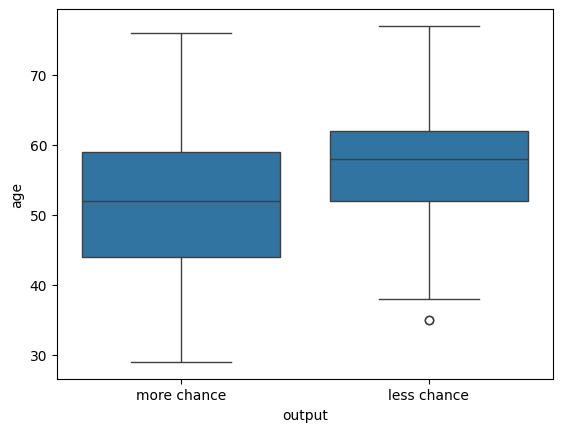

In [20]:
# Exploring the Relationship Between age and output
sns.boxplot(data=df_eda, x='output', y='age')

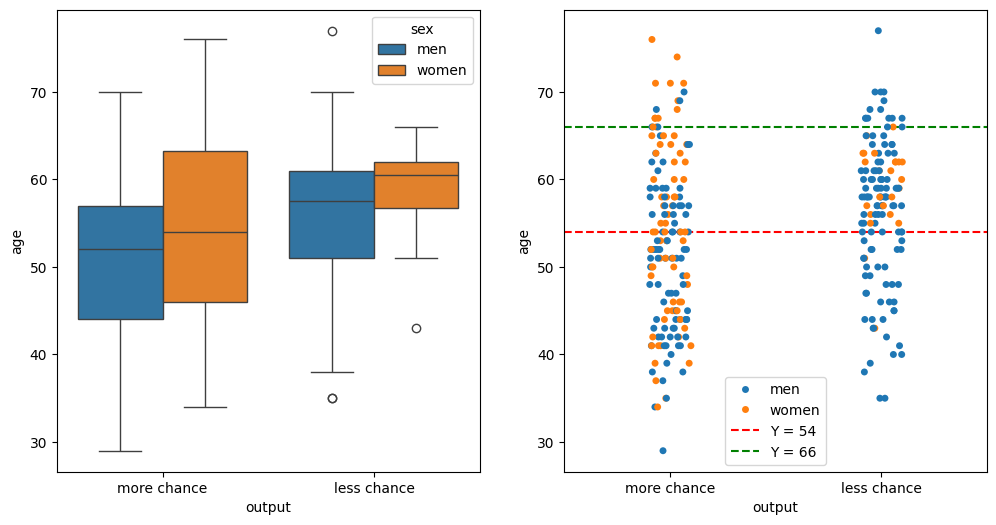

In [21]:
# Exploring the Relationship of sex, age and output
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df_eda, x='output', y='age', hue = 'sex')
plt.subplot(1,2,2)
sns.stripplot(data=df_eda, x='output', y='age', hue = 'sex')
h_value_1 = 54
h_value_2 = 66
plt.axhline(y=h_value_1, color='red', linestyle='--', label=f'Y = {h_value_1}')
plt.axhline(y=h_value_2, color='green', linestyle='--', label=f'Y = {h_value_2}')
plt.legend()

#### از نمودار سمت راست میتوان متوجه شد که در این دیتاست خانم ها در سنین کمتر از 54 و بیشتر از 68 شانس بالایی برای حمله قلبی دارند.

<AxesSubplot: xlabel='cp', ylabel='count'>

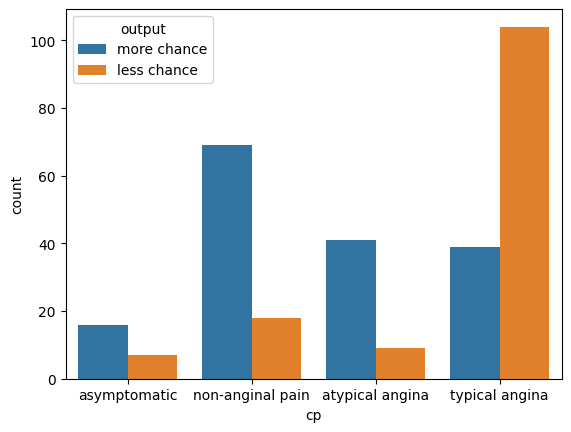

In [22]:
# Exploring the Relationship between cp and output
sns.countplot(data = df_eda, x = 'cp', hue = 'output')

<AxesSubplot: xlabel='cp', ylabel='age'>

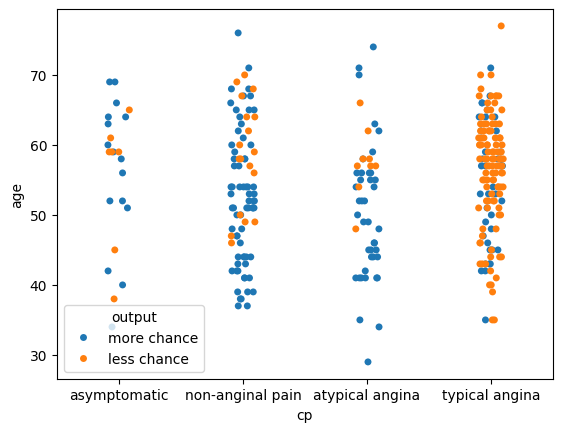

In [23]:
# Exploring the Relationship of cp , age and output
sns.stripplot(data=df_eda, x='cp', y='age', hue = 'output')

افراد گروه 4 در تمامی سنین احتمال مله قلبی دارند. دسته دو و سه در سنین کمتر از 45 حمله قلبی مشاهده نمیشود.

In [24]:
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,more chance
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,more chance
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,more chance
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,more chance
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,more chance


<AxesSubplot: xlabel='trtbps', ylabel='Count'>

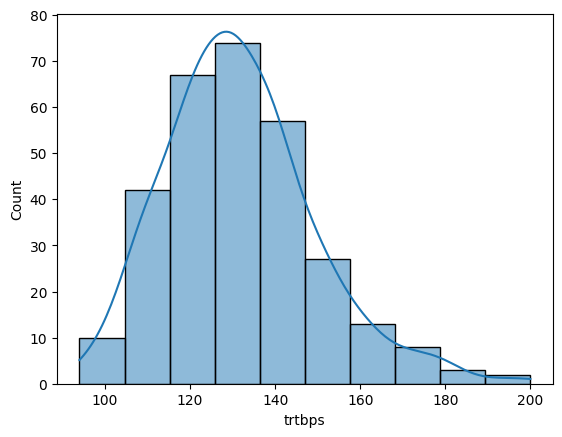

In [25]:
sns.histplot(df_eda['trtbps'], kde = True, bins = 10)

In [26]:
def plot_relplot (df, numerical_x, numerical_y, categorical_hue, categorical_2, categorical_3):
    sns.relplot(data = df, x = numerical_x, y = numerical_y, col = categorical_2, row = categorical_3, hue = categorical_hue)

<Figure size 2400x1200 with 0 Axes>

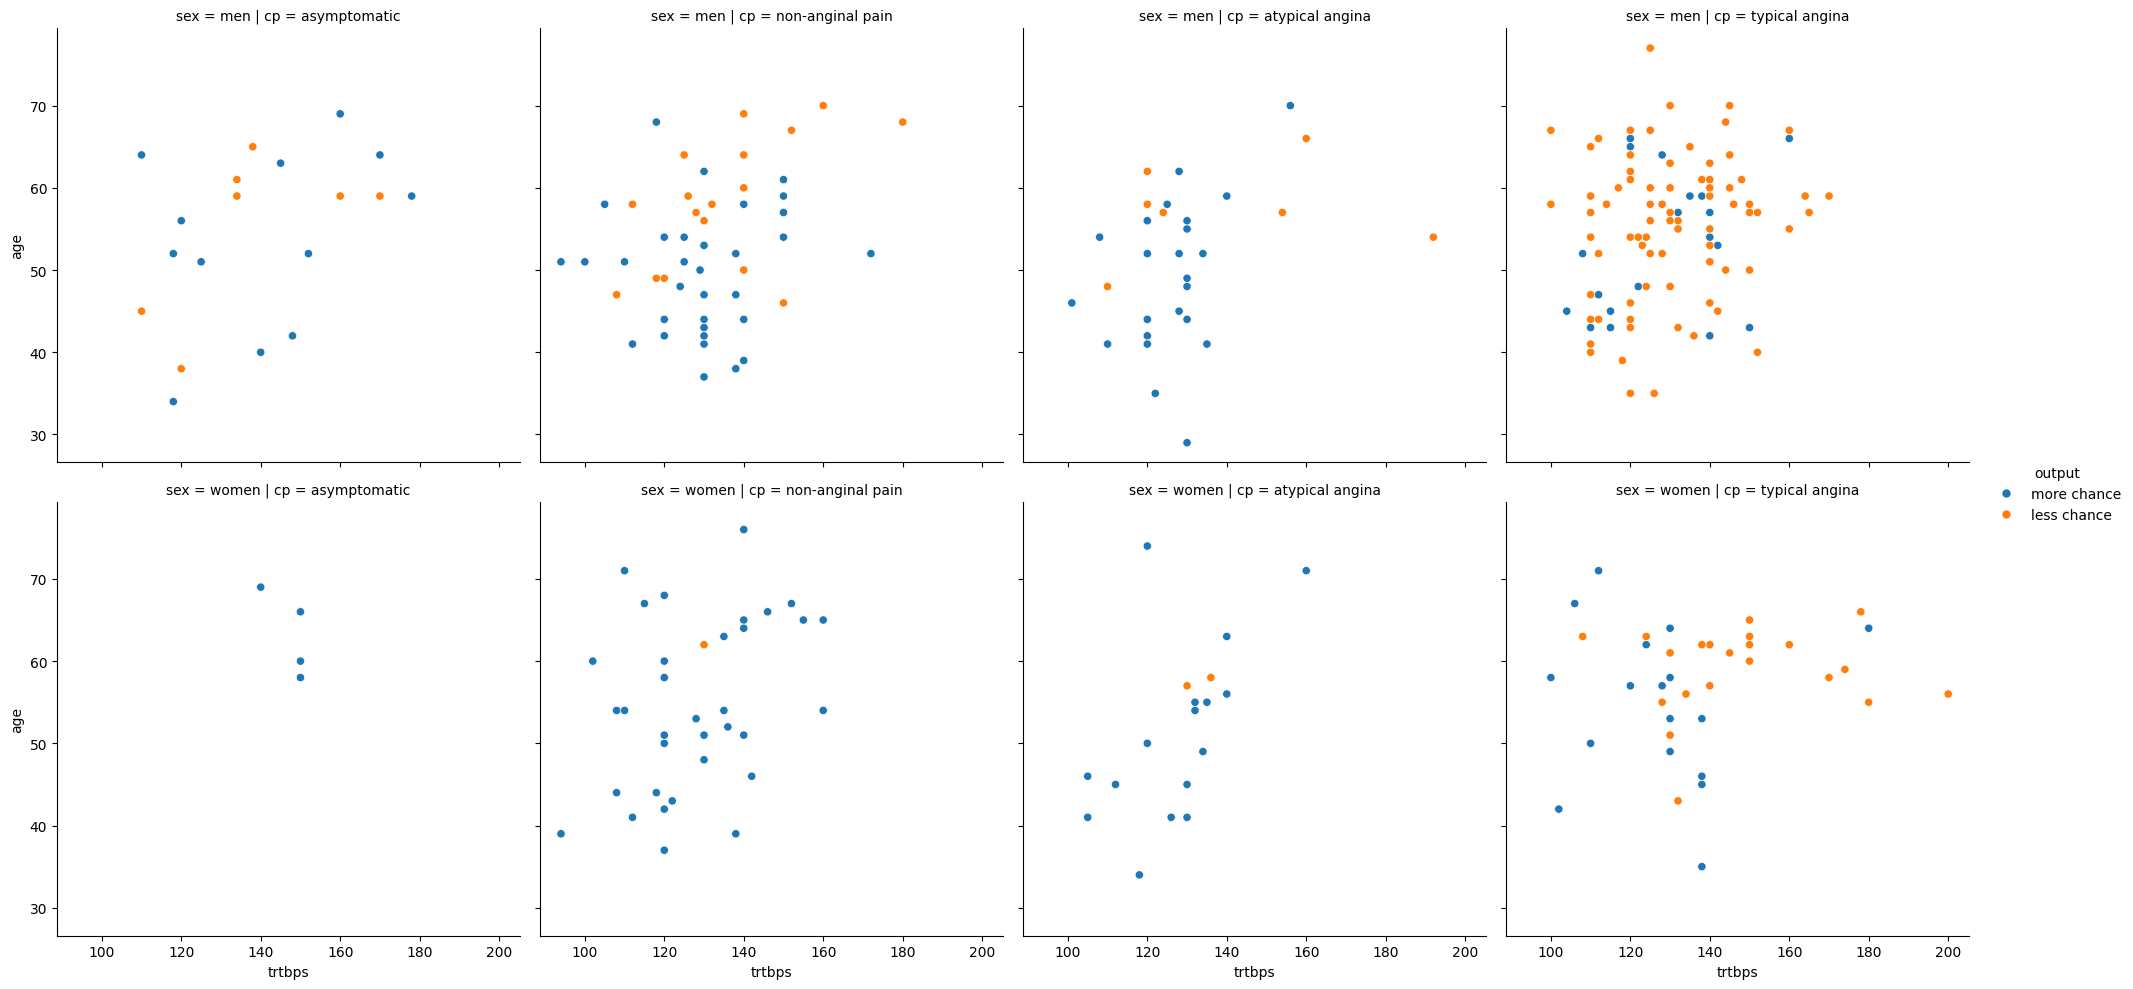

In [27]:
plt.figure(dpi = 200, figsize = (12,6))
sns.relplot(data = df_eda, x = 'trtbps', y = 'age', col = 'cp', row = 'sex', hue = 'output')

توضیح سه نمودار ردیف2

<Figure size 2400x1200 with 0 Axes>

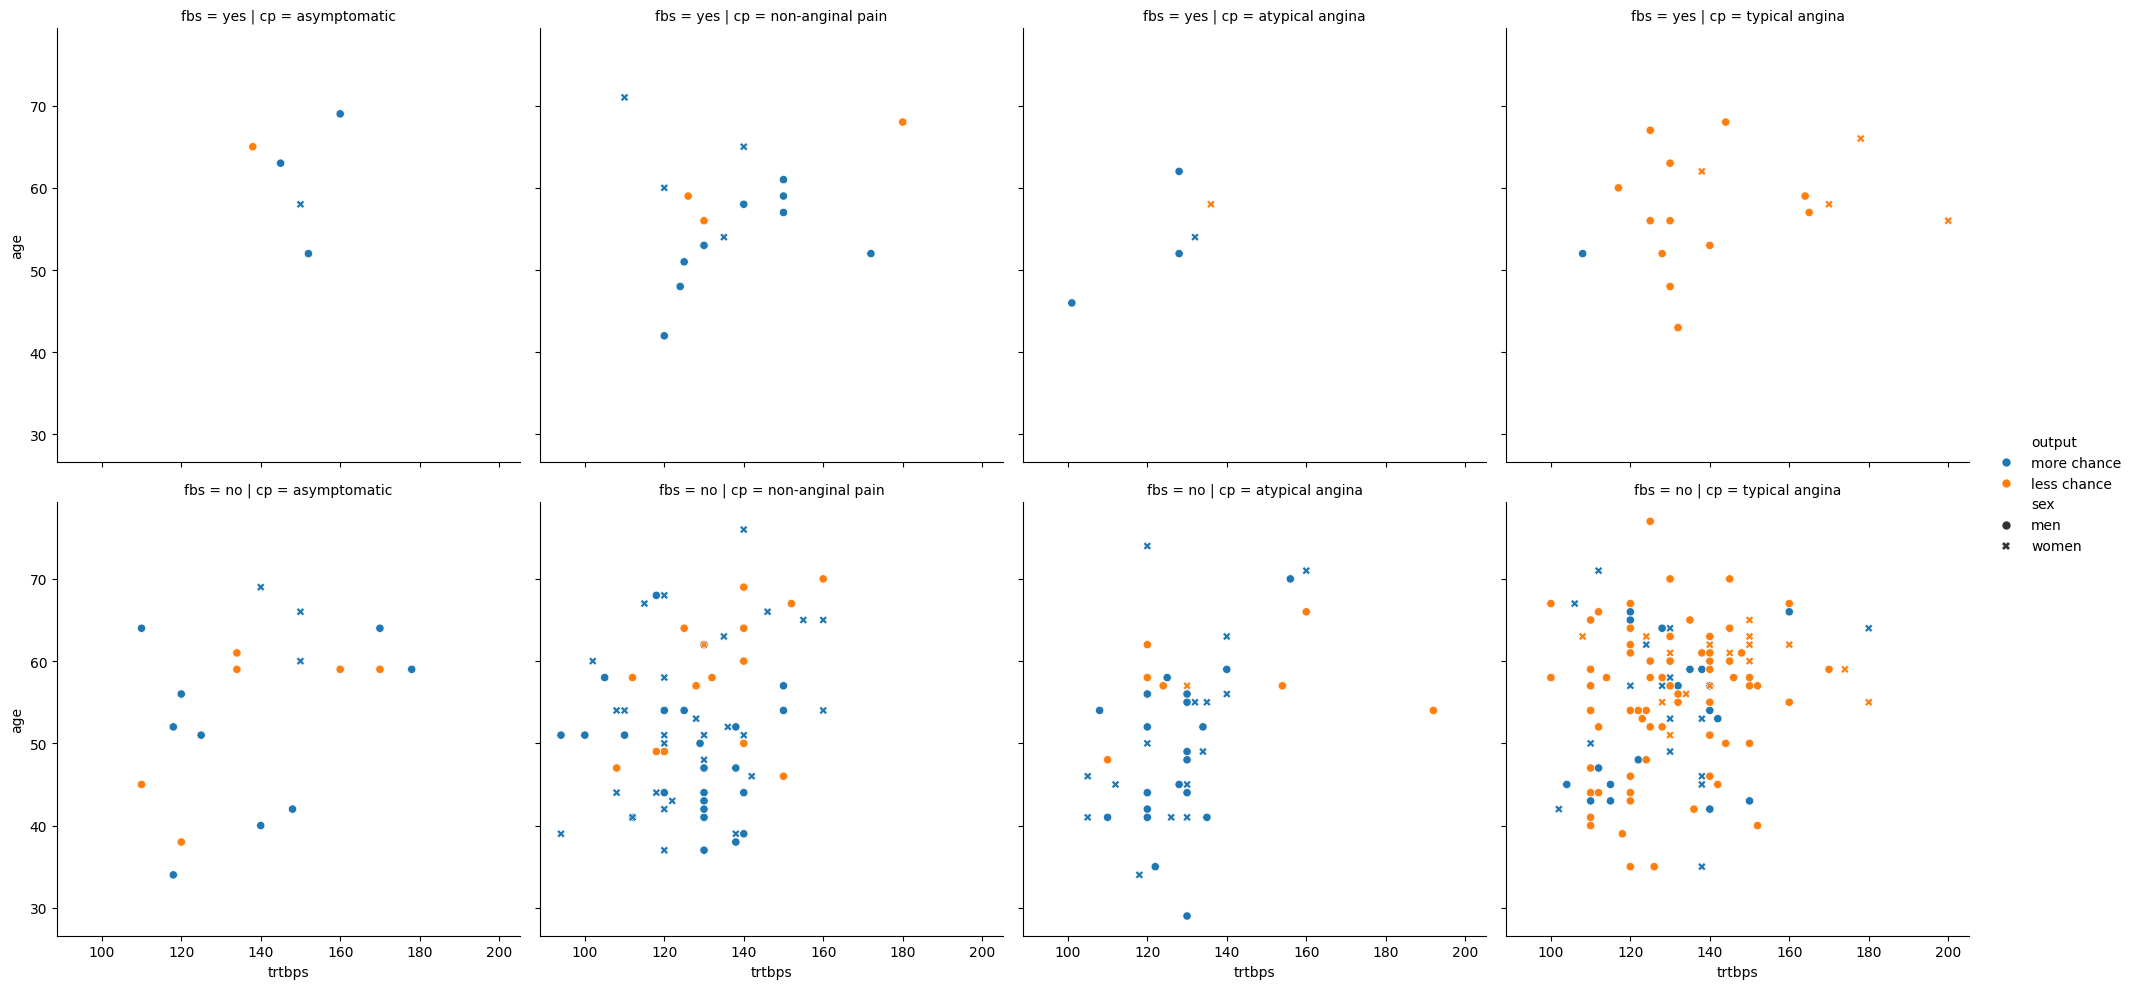

In [28]:
plt.figure(dpi = 200, figsize = (12,6))
sns.relplot(data = df_eda, x = 'trtbps', y = 'age', col = 'cp', row = 'fbs', hue = 'output', style = 'sex')

توضیح نمودار های ردیف اول

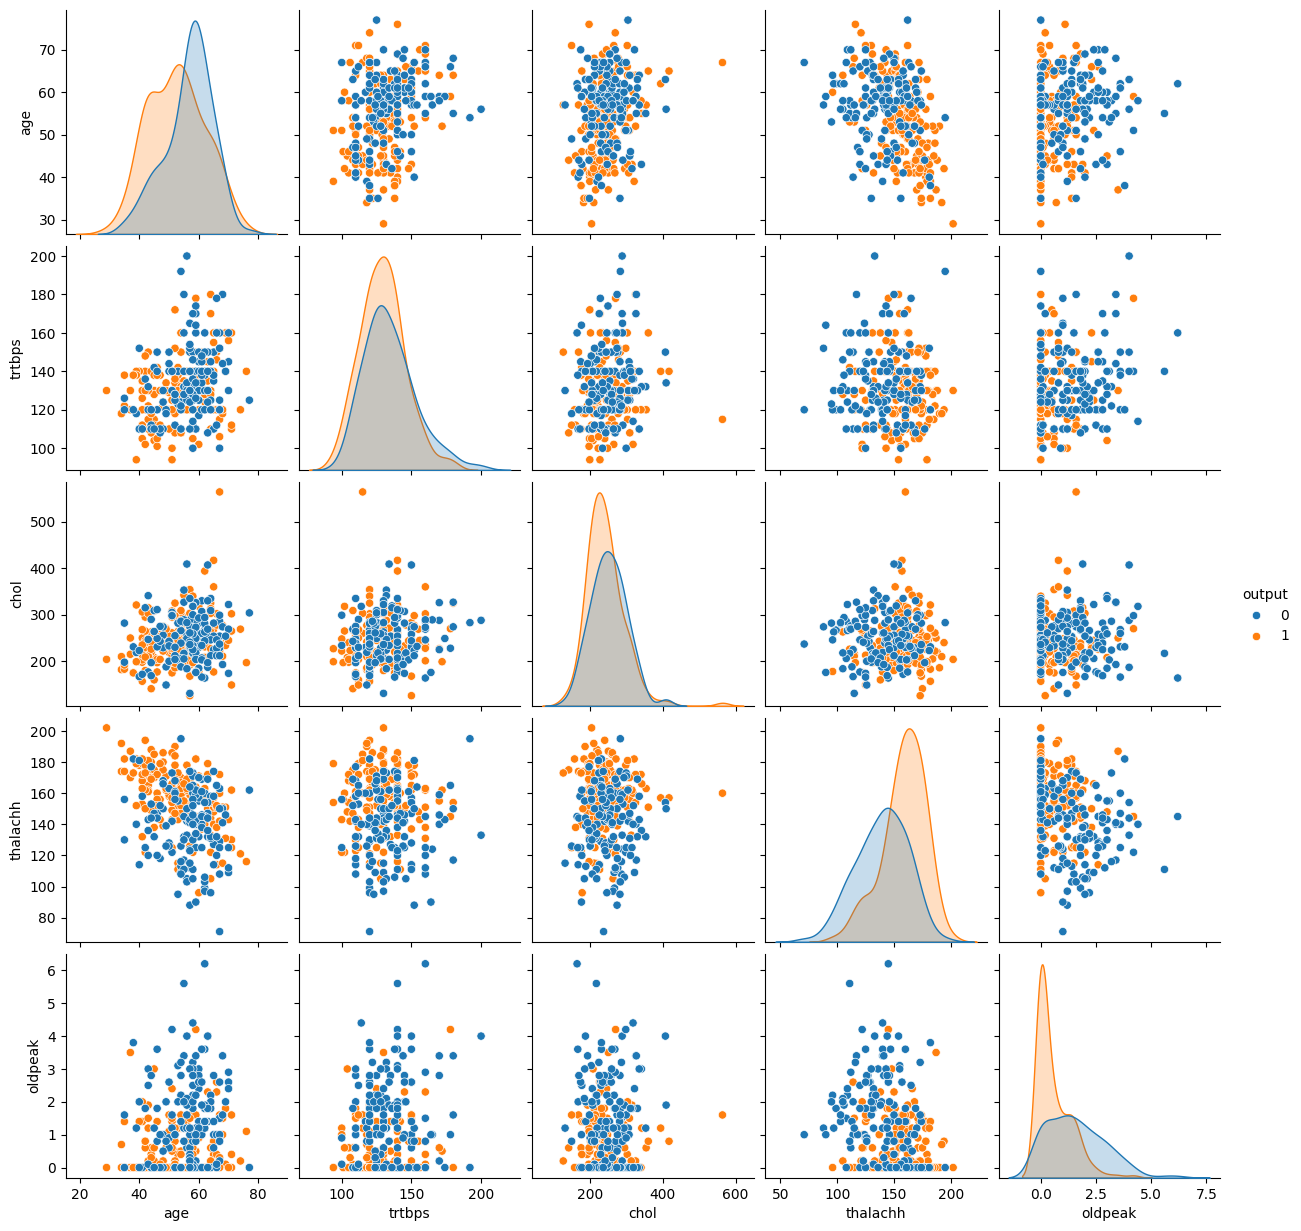

In [29]:
# Create a pair plot for 'age,' 'chol,' 'trtbps,' and 'output'
sns.pairplot(data=df, vars=numerical_columns, hue='output')
plt.show()

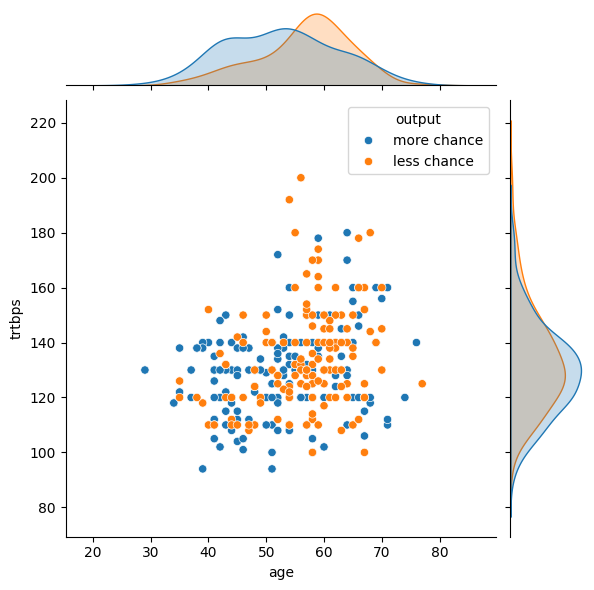

In [30]:
sns.jointplot(data=df_eda, x="age", y="trtbps", hue="output")

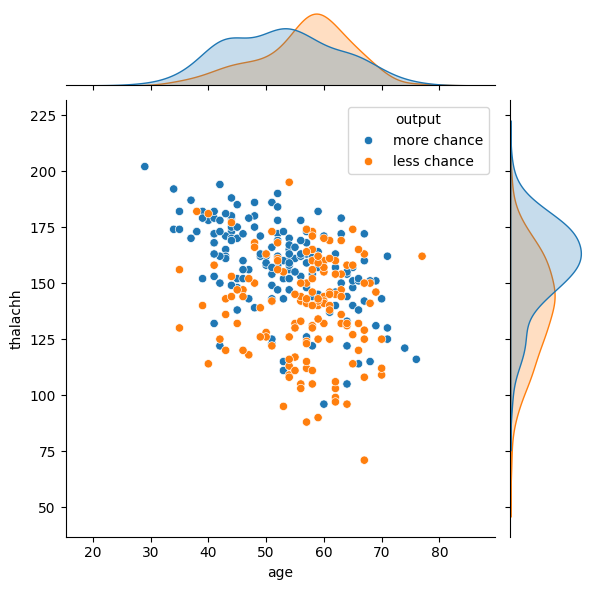

In [31]:
sns.jointplot(data=df_eda, x="age", y="thalachh", hue="output")

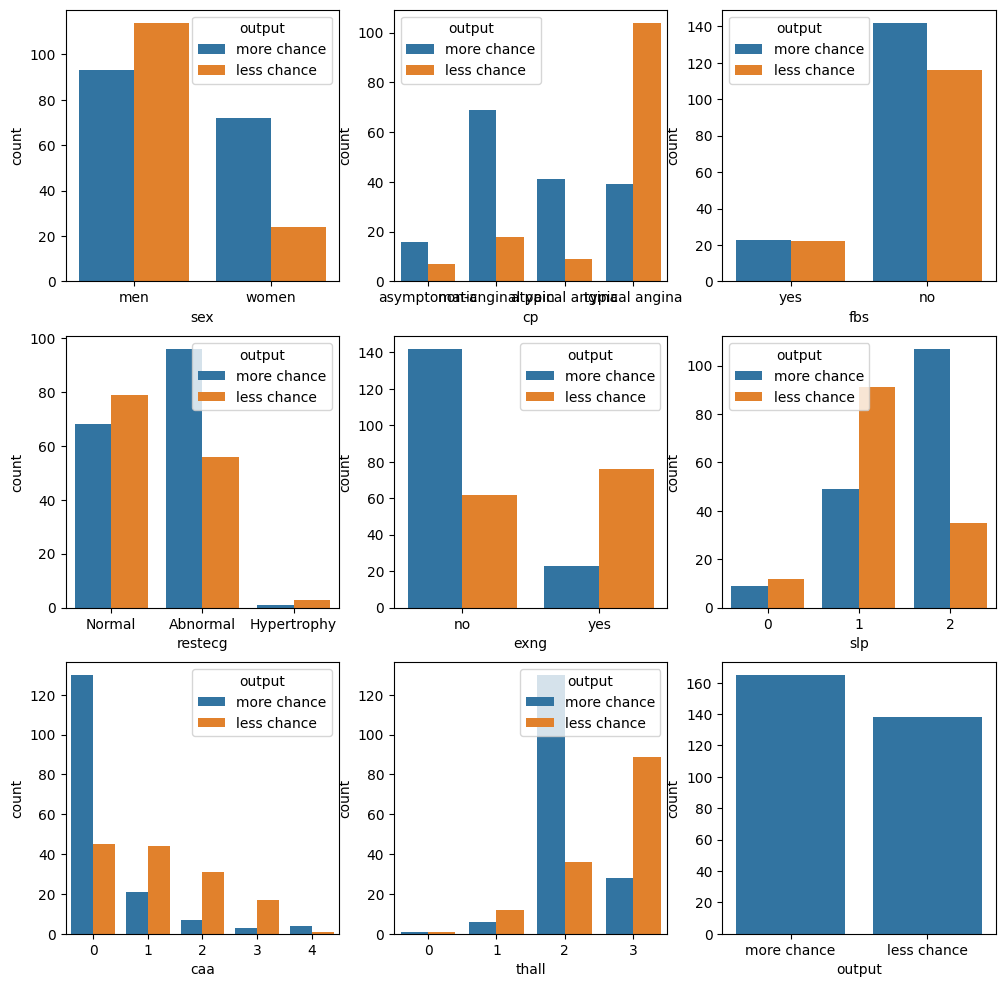

In [32]:
plt.figure(figsize = (12,12))
for col in categoical_columns :
    plt.subplot(3,3, categoical_columns.index(col) + 1)
    if col != 'output' :
        
        sns.countplot(data = df_eda, x = col, hue = 'output')
    else :
        sns.countplot(data = df_eda, x = col)

In [33]:
categoical_columns

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Train a machine learning model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [35]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# preprocess data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
# Convert features to categorical
for feature in categoical_columns:
    df[feature] = df[feature].astype('category')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [39]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [40]:
# one hot encoding categorical features
columns_to_encode = categoical_columns.remove('output')
df_onehot = pd.get_dummies(df, columns=categoical_columns)
df_onehot.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
# choose dataframe
df_final = df_onehot # df

In [42]:
# Extracting features (X) and target variable (y)
X = df_final.drop('output', axis=1)  # Exclude the 'target' column
y = df_final['output']

In [45]:
def plot_confusion(y_real, y_predict):
    
    conf_matrix = confusion_matrix(y_real, y_predict)

    # Plot the Confusion Matrix
    #plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Decision tree

In [47]:
X_train

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
111,57,150,126,173,0.2,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
196,46,150,231,147,3.6,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
115,37,120,215,170,0.0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
114,55,130,262,155,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,52,138,223,169,0.0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
260,66,178,228,165,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
58,34,118,182,174,0.0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
104,50,129,196,163,0.0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [48]:
from sklearn.tree import DecisionTreeClassifier, export_text

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [50]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"test Accuracy: {accuracy}")

test Accuracy: 0.7252747252747253


In [51]:
# train prediction
y_val_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_val_train)
print("Validation Accuracy:", train_accuracy)

Validation Accuracy: 1.0


### pre pruning

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'max_leaf_nodes': [None, 5, 10, 15],  # Maximum number of leaf nodes
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

Best Parameters: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_split': 2}
Accuracy: 0.8021978021978022
Recall: 0.82


## post pruning

In [58]:
from sklearn.model_selection import cross_val_score, train_test_split

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Get the effective alphas and impurities at each step of the pruning process
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Store cross-validation scores for each alpha
cv_scores = []

# Perform cross-validation for different alpha values
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=5)
    cv_scores.append((ccp_alpha, scores.mean()))

# Choose the optimal alpha that maximizes cross-validation score
optimal_alpha, optimal_score = max(cv_scores, key=lambda x: x[1])

# Train the final pruned model using the optimal alpha
final_pruned_tree = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=42)
final_pruned_tree.fit(X_train, y_train)

# Make predictions on the test data with the final pruned model
y_pred_final_pruned = final_pruned_tree.predict(X_test)

# Evaluate the accuracy of the final pruned model
accuracy_final_pruned = accuracy_score(y_test, y_pred_final_pruned)
print(f"Optimal Alpha: {optimal_alpha:.4f}, Accuracy after final pruning: {accuracy_final_pruned}")


Optimal Alpha: 0.0159, Accuracy after final pruning: 0.8021978021978022


In [59]:
# train prediction
y_val_train = final_pruned_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_val_train)
print("train Accuracy:", train_accuracy)

train Accuracy: 0.8679245283018868


In [56]:
# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")

Test Accuracy: 0.8021978021978022
Test Recall: 0.82
